In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit

import sys
sys.path.append('../')
from qclib.state_preparation.cvoqram import cvoqram_initialize
from qclib.state_preparation.sparse_isometry import initialize
from qclib.util import double_sparse


In [2]:
help(initialize)

Help on function initialize in module qclib.state_preparation.sparse_isometry:

initialize(state, aux=False)
    Create circuit to initialize a sparse quantum state arXiv:2006.00016
    
    For instance, to initialize the state a|001>+b|100>
        $ state = {'001': a, '100': b}
        $ circuit = sparse_initialize(state)
    
    Parameters
    ----------
    state: dict of {str:int}
        A unit vector representing a quantum state.
        Keys are binary strings and values are amplitudes.
    
    aux: bool
        circuit with auxiliary qubits if aux == True
    
    Returns
    -------
    sp_circuit: QuantumCircuit
        QuantumCircuit to initialize the state



In [3]:
help(cvoqram_initialize)

Help on function cvoqram_initialize in module qclib.state_preparation.cvoqram:

cvoqram_initialize(state)
    Creates a circuit to initialize a quantum state arXiv:
    
    For instance, to initialize the state a|001>+b|100>
        $ state = [('001', a), ('100', b)]
        $ circuit = sparse_initialize(state)
    
    Parameters
    ----------
    state: list of [(str,float)]
        A unit vector representing a quantum state.
        str: binary string
        float: amplitude
    
    Returns
    -------
    QuantumCircuit to initialize the state



## Number of cnots with cvoqram and pivot state preparation
Number of nonzero amplitudes = $2^s$

p = probability of 1s in binary strings

In [4]:
n_qubits = [6, 7, 8, 9, 10, 11, 12]
s = 4
p = 0.2
repetitions = 30

In [5]:
cnots_pivot = []
cnots_cvoqram = []
for n in n_qubits:
    cx_pivot = 0
    cx_cvoqram = 0
    for k in range(repetitions):
        data = double_sparse(n, s, p)

        qc_pivot = initialize(dict(data), aux=True)
        qc_cvoqram = cvoqram_initialize(data)

        qc_pivot = qiskit.transpile(qc_pivot, basis_gates=['u','cx'])
        qc_cvoqram = qiskit.transpile(qc_cvoqram, basis_gates=['u','cx'])
        
        cx_pivot = cx_pivot + qc_pivot.count_ops()['cx']
        cx_cvoqram = cx_cvoqram + qc_cvoqram.count_ops()['cx']
        
    cnots_pivot.append(cx_pivot / repetitions)
    cnots_cvoqram.append(cx_cvoqram / repetitions)

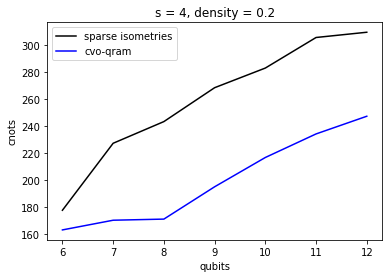

In [6]:
plt.plot(n_qubits, cnots_pivot, color='black', label='sparse isometries')
plt.plot(n_qubits, cnots_cvoqram, color='blue', label='cvo-qram')
plt.xlabel('qubits')
plt.ylabel('cnots')
plt.title('s = {}, density = {}'.format(s, p))
plt.legend()
plt.show()